In [2]:
#Import Libraries

import pandas as pd
import math
import statistics
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Data Set

bank_df = pd.read_csv('Dataset/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#Find Number of Columns and Rows in Data Set

bank_df.shape

(4521, 17)

In [5]:
#Find Type of Variables

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#Descriptive Statistics

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
#Find any missing values

bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [51]:
# Create new dataframe

bank = pd.DataFrame(data = bank_df)

In [52]:
#Change *job*, *marital*, *education*, *contact*, *poutcome* to categories.

bank['job'] = bank['job'].astype('category')
bank['marital'] = bank['marital'].astype('category')
bank['education'] = bank['education'].astype('category')
bank['contact'] = bank['contact'].astype('category')
bank['poutcome'] = bank['poutcome'].astype('category')

In [53]:
#Replace yes and no to binary values 0 and 1
bank.replace(['no', 'yes'], [0,1], inplace = True)

In [54]:
#Create new variable of date

bank['Date'] = bank['month'].map(str) + '-' + bank['day'].map(str)
bank['month'] = bank['month'].astype('category')

In [55]:
bank['Date'].value_counts()

may-15    114
may-14    101
may-13    100
may-7      99
may-6      90
         ... 
feb-8       1
mar-17      1
aug-30      1
sep-16      1
dec-16      1
Name: Date, Length: 256, dtype: int64

In [56]:
bank = bank.rename(columns={'y': 'deposit'})

In [57]:
bank.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
deposit         int64
Date           object
dtype: object

Text(0.5, 1.0, 'Distribution over Months')

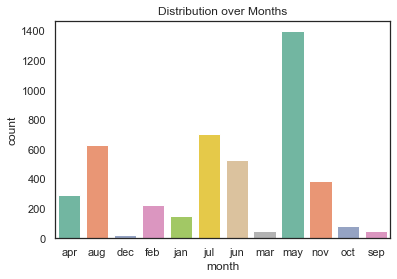

In [58]:
sns.countplot(x = bank['month'], palette = 'Set2', data = bank).set_title('Distribution over Months')

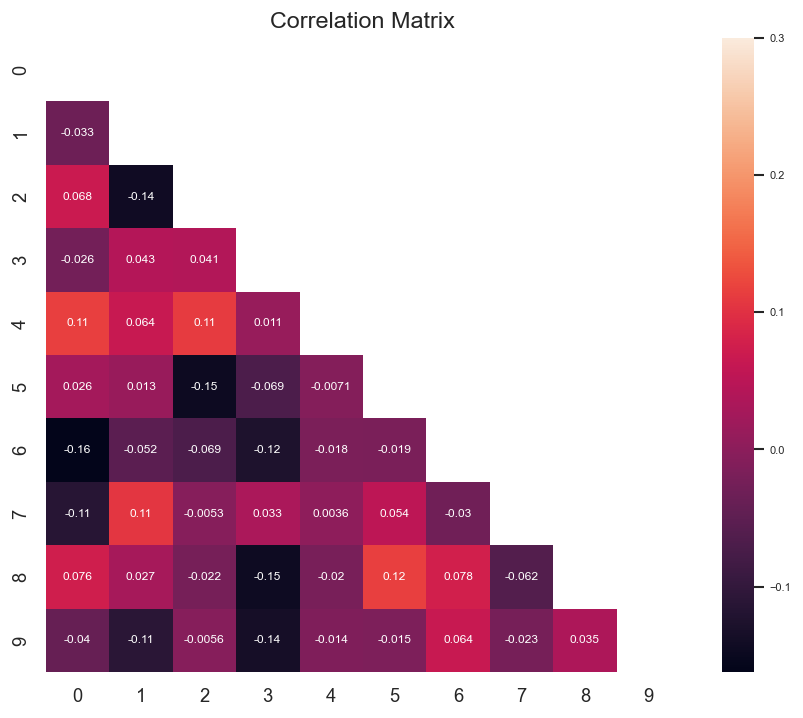

In [59]:
#Find which variables have the highest correlation
%matplotlib inline

corr = np.corrcoef(np.random.randn(10,200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (9,7), dpi = 120)
    sns.set(font_scale = .6)
    ax = sns.heatmap(corr, mask = mask, vmax = .3, square = True, annot = True)
    ax.set_title('Correlation Matrix', fontsize = 14)

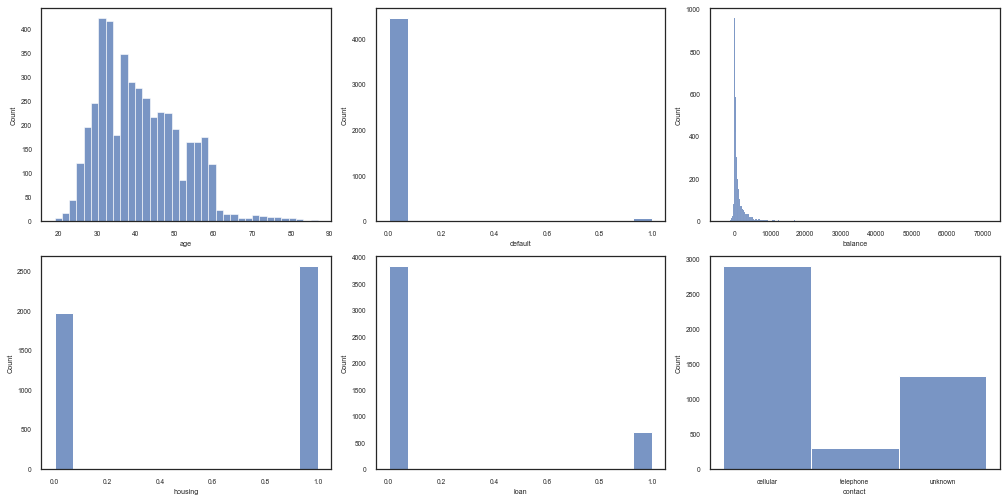

In [60]:
#Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'age', ax = axs[0,0])
sns.histplot(data = bank, x = 'default', ax = axs[0,1])
sns.histplot(data = bank, x = 'balance', ax = axs[0,2])
sns.histplot(data = bank, x = 'housing', ax = axs[1,0])
sns.histplot(data = bank, x = 'loan', ax = axs[1,1])
sns.histplot(data = bank, x = 'contact', ax = axs[1,2])


plt.tight_layout()

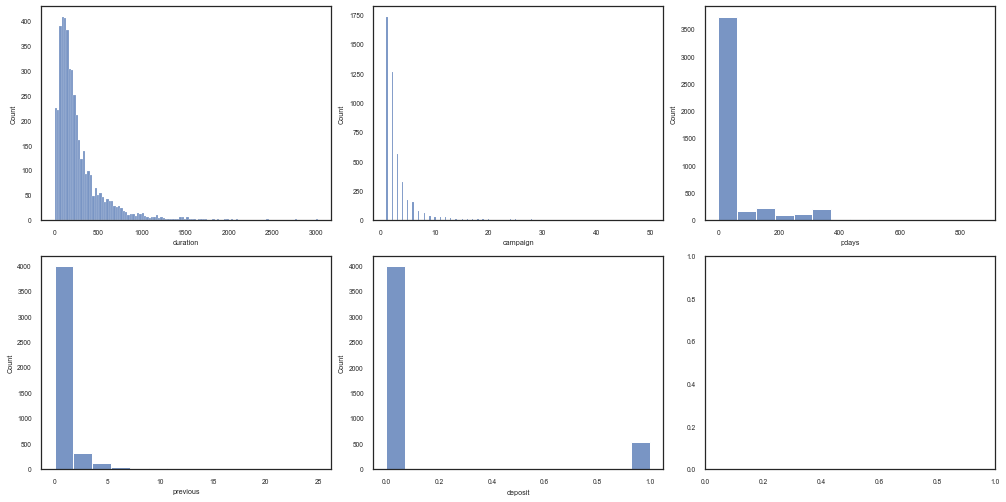

In [63]:
#Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'duration', ax = axs[0,0])
sns.histplot(data = bank,x = 'campaign', ax = axs[0,1])
sns.histplot(data = bank, x = 'pdays', ax = axs[0,2])
sns.histplot(data = bank, x = 'previous', ax = axs[1,0])
sns.histplot(data = bank, x = 'deposit', ax = axs[1,1])

plt.tight_layout()

In [64]:
bank.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,-0.070517
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714


Text(0.5, 1.0, 'Centrality for Age')

<Figure size 1008x864 with 0 Axes>

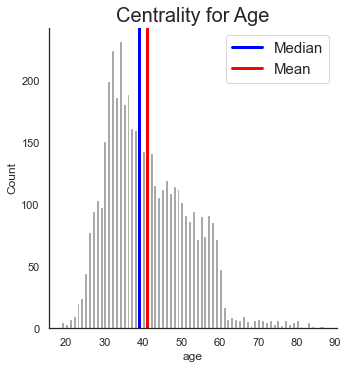

In [65]:
# Plot Size

sns.set(font_scale=1)
Size = plt.figure()
Size.set_figwidth(14)
Size.set_figheight(12)
sns.set_style("white")

#Plot Histogram

Central_Age = sns.displot(bank["age"], kde=False, binwidth=.5, color = 'grey')
plt.axvline(x=bank.age.median(), linewidth=3, color='blue', label="median", alpha=1)
plt.axvline(x=bank.age.mean(), linewidth=3, color='red', label="mean", alpha=1)
plt.legend(['Median', 'Mean'], fontsize=15)
plt.title("Centrality for Age", fontsize=20)

In [66]:
#Bin Ages into 4 Groups
bank['Age_Dist'] = pd.qcut(bank['age'], q=4)

In [67]:
bank['Age_Dist'].value_counts()

(18.999, 33.0]    1241
(39.0, 49.0]      1203
(33.0, 39.0]      1049
(49.0, 87.0]      1028
Name: Age_Dist, dtype: int64

In [68]:
bank['Age_Dist'].dtypes

CategoricalDtype(categories=[(18.999, 33.0], (33.0, 39.0], (39.0, 49.0], (49.0, 87.0]], ordered=True)

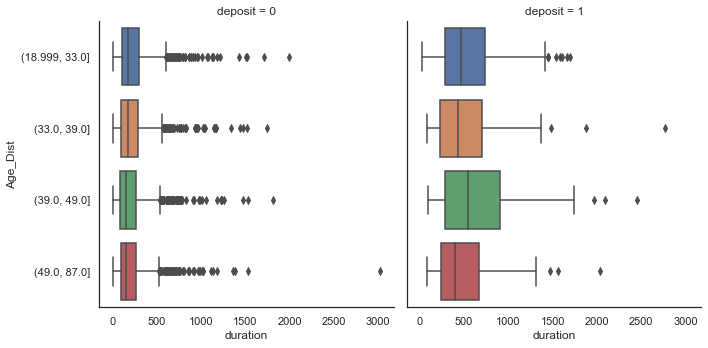

In [69]:
g = sns.catplot(x = 'duration', y="Age_Dist", col="deposit", kind="box", data=bank)


Text(0.5, 1.0, 'Age vs Deposit')

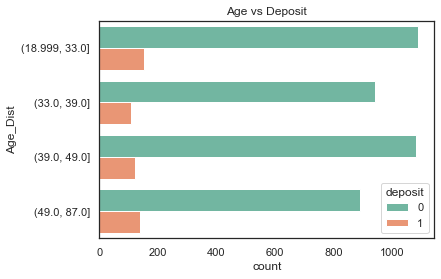

In [70]:
#Finding any commonalities between age groups of subscribers
sns.countplot(y="Age_Dist", hue = 'deposit', palette = 'Set2', data=bank).set_title('Age vs Deposit')